In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import shapiro

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', None) # Muestra todas las filas.
pd.set_option('display.max_columns', None) # Muestra todas las columnas.
pd.set_option('display.float_format', '{:.2f}'.format) # Redondea a dos decimales.


In [2]:
# Carga el dataframe de los alquileres.

df2 = pd.read_csv('2017_lloguer_preu_trim.csv')
preu_lloguer = pd.DataFrame(df2)

preu_lloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


Hago una división del DataFrame en dos (Lloguer mitjà mensual (Euros/mes) / Lloguer mitjà per superfície (Euros/m2 mes)).  
Trabajaré de ahora en adelante con *Lloguer mitjà mensual (Euros/mes)* dado que la información es muy similar, pero parece una fórmula más común.

In [3]:
# Comprobamos que solo existen dos valores en la variable Lloguer_mitja.

preu_lloguer['Lloguer_mitja'].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [4]:
# Divide el dataframe en dos.

preu_lloguer_m2 = preu_lloguer[preu_lloguer['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
preu_lloguer_mes = preu_lloguer[preu_lloguer['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

print('Preu Euros m2: ',preu_lloguer_m2.shape)
print('Preu Euros mes: ',preu_lloguer_mes.shape)

preu_lloguer_mes.head()

Preu Euros m2:  (292, 8)
Preu Euros mes:  (292, 8)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [6]:
# Carga el dataframe del nivel de ruido.

df3 = pd.read_csv('2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv')
nivel_ruido = pd.DataFrame(df3)

nivel_ruido.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%


In [8]:
# Unifica las dos tablas dejando la de los alquileres como principal.

tabla = pd.merge(preu_lloguer_mes, nivel_ruido, on=['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'], how='left')

In [9]:
tabla.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,<40 dB,7.73%
1,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,40-45 dB,26.98%
2,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,45-50 dB,7.38%
3,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,50-55 dB,11.97%
4,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,55-60 dB,19.85%


In [10]:
# Muestra información sobre el tipo de datos que compone el dataframe.

tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75920 entries, 0 to 75919
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             75920 non-null  int64  
 1   Trimestre       75920 non-null  int64  
 2   Codi_Districte  75920 non-null  int64  
 3   Nom_Districte   75920 non-null  object 
 4   Codi_Barri      75920 non-null  int64  
 5   Nom_Barri       75920 non-null  object 
 6   Lloguer_mitja   75920 non-null  object 
 7   Preu            70980 non-null  float64
 8   Concepte        75920 non-null  object 
 9   Rang_soroll     75920 non-null  object 
 10  Valor           75920 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 7.0+ MB


In [11]:
# Cambia el nombre de la columna Valor y quita el signo de % para poder transformar luego a float.

tabla.rename(columns={'Valor': 'Valor_%'}, inplace=True)
tabla['Valor_%'] = tabla['Valor_%'].str.replace('%', '')

In [12]:
# Cambia los tipos de datos (string / float / int).
tabla = tabla.astype({'Nom_Districte':'string', 'Nom_Barri': 'string', 'Lloguer_mitja': 'string', 'Concepte':'string','Rang_soroll':'string', 'Valor_%':'float'})

In [13]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75920 entries, 0 to 75919
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             75920 non-null  int64  
 1   Trimestre       75920 non-null  int64  
 2   Codi_Districte  75920 non-null  int64  
 3   Nom_Districte   75920 non-null  string 
 4   Codi_Barri      75920 non-null  int64  
 5   Nom_Barri       75920 non-null  string 
 6   Lloguer_mitja   75920 non-null  string 
 7   Preu            70980 non-null  float64
 8   Concepte        75920 non-null  string 
 9   Rang_soroll     75920 non-null  string 
 10  Valor_%         75920 non-null  float64
dtypes: float64(2), int64(4), string(5)
memory usage: 7.0 MB


In [14]:
tabla.describe().T

,count,mean,std,min,25%,50%,75%,max
Any,75920.00,2017.00,0.00,2017.00,2017.00,2017.00,2017.00,2017.00
Trimestre,75920.00,2.50,1.12,1.00,1.75,2.50,3.25,4.00
Codi_Districte,75920.00,6.25,2.79,1.00,4.00,7.00,8.00,10.00
Codi_Barri,75920.00,37.00,21.07,1.00,19.00,37.00,55.00,73.00
Preu,70980.00,829.38,252.75,302.52,680.80,771.78,912.51,1882.42
Valor_%,75920.00,10.00,23.23,0.00,0.00,0.00,8.59,100.00


In [15]:
tabla.describe(include = 'string').T

,count,unique,top,freq
Nom_Districte,75920,10,Nou Barris,13520
Nom_Barri,75920,73,el Raval,1040
Lloguer_mitja,75920,1,Lloguer mitjà mensual (Euros/mes),75920
Concepte,75920,26,TOTAL_D,2920
Rang_soroll,75920,10,<40 dB,7592


In [16]:
# Comprueba si existen valores nulos.

nulos = tabla.isna()
nulos_x_columna = nulos.sum()
nulos_x_columna

Any                  0
Trimestre            0
Codi_Districte       0
Nom_Districte        0
Codi_Barri           0
Nom_Barri            0
Lloguer_mitja        0
Preu              4940
Concepte             0
Rang_soroll          0
Valor_%              0
dtype: int64

In [17]:
barrios = preu_lloguer['Nom_Barri'].unique()

for barrio in barrios:
    # Itera por todos los barrios
    barrio_iterado = preu_lloguer[preu_lloguer['Nom_Barri'] == barrio]
    
    # Si todas las filas del barrio tienen precio nulo, borra las filas de ese barrio.
    if barrio_iterado['Preu'].isnull().all():
        tabla = tabla.drop(tabla[tabla['Nom_Barri'] == barrio].index)
        
    # En caso contrario, establece el precio promedio del barrio y lo actualiza en la tabla solo si es nulo.
    else:
        precio_barrio = barrio_iterado['Preu'].mean()
        mask = (tabla['Nom_Barri'] == barrio) & tabla['Preu'].isnull()
        tabla.loc[mask, 'Preu'] = precio_barrio


In [18]:
# comprueba de nuevo la existencia de nulos

nulos = tabla.isna()
nulos_x_columna = nulos.sum()
nulos_x_columna

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
Concepte          0
Rang_soroll       0
Valor_%           0
dtype: int64

In [19]:
tabla.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Rang_soroll,Valor_%
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,<40 dB,7.73
1,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,40-45 dB,26.98
2,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,45-50 dB,7.38
3,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,50-55 dB,11.97
4,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,55-60 dB,19.85


In [20]:
# Asigna un valor a cada uno de los rangos para que el análisis PCA lo interprete mejor.

tabla.loc[tabla['Rang_soroll'] == '<40 dB', 'Rang_soroll_num'] = 1
tabla.loc[tabla['Rang_soroll'] == '40-45 dB', 'Rang_soroll_num'] = 2
tabla.loc[tabla['Rang_soroll'] == '45-50 dB', 'Rang_soroll_num'] = 3
tabla.loc[tabla['Rang_soroll'] == '50-55 dB', 'Rang_soroll_num'] = 4
tabla.loc[tabla['Rang_soroll'] == '55-60 dB', 'Rang_soroll_num'] = 5
tabla.loc[tabla['Rang_soroll'] == '60-65 dB', 'Rang_soroll_num'] = 6
tabla.loc[tabla['Rang_soroll'] == '65-70 dB', 'Rang_soroll_num'] = 7
tabla.loc[tabla['Rang_soroll'] == '70-75 dB', 'Rang_soroll_num'] = 8
tabla.loc[tabla['Rang_soroll'] == '75-80 dB', 'Rang_soroll_num'] = 9
tabla.loc[tabla['Rang_soroll'] == '>=80 dB', 'Rang_soroll_num'] = 10

In [21]:
# Convierte la columna a tipo de datos entero (int) y elimina la columna antigua

tabla['Rang_soroll_num'] = tabla['Rang_soroll_num'].astype(int)
tabla = tabla.drop('Rang_soroll', axis=1)
tabla.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Concepte,Valor_%,Rang_soroll_num
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,7.73,1
1,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,26.98,2
2,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,7.38,3
3,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,11.97,4
4,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,TOTAL_D,19.85,5


In [22]:
# Aplicamos test de Shapiro-Wilk para comprobar la normalidad de las variables:

from scipy.stats import shapiro

columnas_a_probar = tabla[['Preu', 'Valor_%','Rang_soroll_num']]

Probablemente_Gaussiana = []
Probablemente_NO_Gaussiana = []

for i in columnas_a_probar:
    data = tabla[i]
    print(i)
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Probablemente sea Gaussiana')
        Probablemente_Gaussiana.append(i)
    else:
        print('Probablemente NO sea Gaussiana')
        Probablemente_NO_Gaussiana.append(i)


Preu
stat=0.913, p=0.000
Probablemente NO sea Gaussiana
Valor_%
stat=0.471, p=0.000
Probablemente NO sea Gaussiana
Rang_soroll_num
stat=0.935, p=0.000
Probablemente NO sea Gaussiana


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Dado que las variables numéricas no son Gaussianas, aplicaremos **Robust Scaler** para las que contienen valores atípicos y **MinMax Scaling** para las variables sin valores atípicos.  
En cuanto al las variables categóricas (CHAS y RAD), aplicaremos la Codificación **One-Hot**.

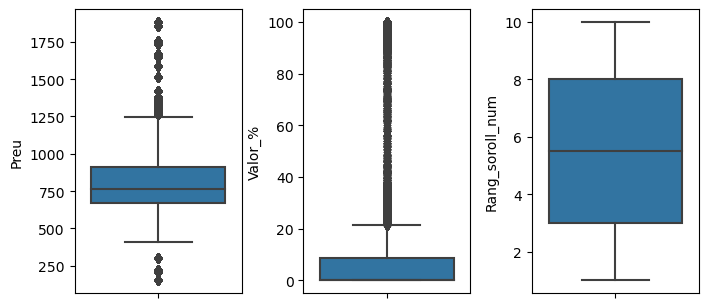

In [23]:
# Representamos gráficamente las distintas variables para ver su distribución, presencia / ausencia de outliers..

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(7, 3))
index = 0
axs = axs.flatten()

for k, v in columnas_a_probar.items():
    sns.boxplot(y=k, data=tabla, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4)
plt.show()


Tras haber procesado TODOS los datos , el resultado del análisis PCA, tanto con dos componentes como con tres (PC1, PC2 y PC3), lo valores son muy similares, luego los valores principales son constantes en el conjunto de datos y no están captando un variabilidad significativa.  
Pudiera ser que algunas variables estén altamente relacionadas entre sí, aportando poca información, por lo que procederé a eliminar alguna de las variables antes de volver a procesar los datos:  
- Dado que cada Distrito contiene varios barrios, y los barrios dan mas informacion (son 70 contra 10). Eliminaré los distritos (nom_districte y codi_districte) y de los barrios dejaré solo nom_barri y eliminaré codi_barri
- Eliminaré también Any y Lloguer_mitja, ya que ambas tienen un sólo valor.

In [24]:
# Hacemos una copia del dataframe para proceder al escalado de las variables.

tabla_proces = tabla.copy()

# Aplicamos RobustScaler:

Robust = ['Preu', 'Valor_%']
scaler2 = preprocessing.RobustScaler().fit(tabla_proces[Robust])
tabla_proces[Robust] = scaler2.transform(tabla_proces[Robust])

# Aplicamos MinMax:

Min_Max = ['Rang_soroll_num']
scaler3 = preprocessing.MinMaxScaler().fit(tabla_proces[Min_Max])
tabla_proces[Min_Max] = scaler3.transform(tabla_proces[Min_Max])

In [25]:
# selecciona las columnas del escalado y mantiene sólo esas en la tabla_proces.

columnas_escalado = ['Preu', 'Valor_%', 'Rang_soroll_num']
tabla_proces = tabla_proces[columnas_escalado]

tabla_proces.head()

,Preu,Valor_%,Rang_soroll_num
0,-0.13,0.90,0.00
1,-0.13,3.14,0.11
2,-0.13,0.86,0.22
3,-0.13,1.39,0.33
4,-0.13,2.31,0.44


In [26]:
# Hace una copia del dataframe para aplicar One Hot Encoder.

tabla_dummies = tabla.copy()

In [27]:
# Aplica One Hot Encoder a Nom_Barri y Concepte.

tabla_dummies = pd.get_dummies(tabla_dummies, columns=['Nom_Barri', 'Concepte'])

# Elimina el resto de columnas (Todas excepto Nom_Barri y Concepte que ya no existen al haber sido transformadas).

tabla_dummies = tabla_dummies.drop(columns = tabla.columns.difference(['Nom_Barri', 'Concepte']))

In [28]:
tabla_dummies.head()

,Nom_Barri_Can Baró,Nom_Barri_Can Peguera,Nom_Barri_Canyelles,Nom_Barri_Ciutat Meridiana,Nom_Barri_Diagonal Mar i el Front Marítim del Poblenou,Nom_Barri_Horta,Nom_Barri_Hostafrancs,Nom_Barri_Montbau,Nom_Barri_Navas,Nom_Barri_Pedralbes,Nom_Barri_Porta,Nom_Barri_Provençals del Poblenou,Nom_Barri_Sant Andreu,Nom_Barri_Sant Antoni,Nom_Barri_Sant Genís dels Agudells,Nom_Barri_Sant Gervasi - Galvany,Nom_Barri_Sant Gervasi - la Bonanova,Nom_Barri_Sant Martí de Provençals,"Nom_Barri_Sant Pere, Santa Caterina i la Ribera",Nom_Barri_Sants,Nom_Barri_Sants - Badal,Nom_Barri_Sarrià,Nom_Barri_Torre Baró,Nom_Barri_Vallbona,Nom_Barri_Vallcarca i els Penitents,"Nom_Barri_Vallvidrera, el Tibidabo i les Planes",Nom_Barri_Verdun,Nom_Barri_Vilapicina i la Torre Llobeta,Nom_Barri_el Baix Guinardó,Nom_Barri_el Barri Gòtic,Nom_Barri_el Besòs i el Maresme,Nom_Barri_el Bon Pastor,Nom_Barri_el Camp d'en Grassot i Gràcia Nova,Nom_Barri_el Camp de l'Arpa del Clot,Nom_Barri_el Carmel,Nom_Barri_el Clot,Nom_Barri_el Coll,Nom_Barri_el Congrés i els Indians,Nom_Barri_el Fort Pienc,Nom_Barri_el Guinardó,Nom_Barri_el Parc i la Llacuna del Poblenou,Nom_Barri_el Poble Sec,Nom_Barri_el Poblenou,Nom_Barri_el Putxet i el Farró,Nom_Barri_el Raval,Nom_Barri_el Turó de la Peira,Nom_Barri_l'Antiga Esquerra de l'Eixample,Nom_Barri_la Barceloneta,Nom_Barri_la Bordeta,Nom_Barri_la Dreta de l'Eixample,Nom_Barri_la Font d'en Fargues,Nom_Barri_la Font de la Guatlla,Nom_Barri_la Guineueta,Nom_Barri_la Marina de Port,Nom_Barri_la Maternitat i Sant Ramon,Nom_Barri_la Nova Esquerra de l'Eixample,Nom_Barri_la Prosperitat,Nom_Barri_la Sagrada Família,Nom_Barri_la Sagrera,Nom_Barri_la Salut,Nom_Barri_la Teixonera,Nom_Barri_la Trinitat Nova,Nom_Barri_la Trinitat Vella,Nom_Barri_la Vall d'Hebron,Nom_Barri_la Verneda i la Pau,Nom_Barri_la Vila Olímpica del Poblenou,Nom_Barri_la Vila de Gràcia,Nom_Barri_les Corts,Nom_Barri_les Roquetes,Nom_Barri_les Tres Torres,Concepte_FFCC_D,Concepte_FFCC_DEN,Concepte_FFCC_E,Concepte_FFCC_N,Concepte_GI_TR_D,Concepte_GI_TR_DEN,Concepte_GI_TR_E,Concepte_GI_TR_N,Concepte_INDUST_D,Concepte_INDUST_DEN,Concepte_INDUST_E,Concepte_INDUST_N,Concepte_OCI_N,Concepte_PARCS_D,Concepte_PATIS_D,Concepte_PATIS_E,Concepte_TOTAL_D,Concepte_TOTAL_DEN,Concepte_TOTAL_E,Concepte_TOTAL_N,Concepte_TRANSIT_D,Concepte_TRANSIT_DEN,Concepte_TRANSIT_E,Concepte_TRANSIT_N,Concepte_VIANANTS_D,Concepte_VIANANTS_E
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
tabla_pca = pd.concat([tabla_proces, tabla_dummies], axis = 1)

In [30]:
tabla_pca.head()

,Preu,Valor_%,Rang_soroll_num,Nom_Barri_Can Baró,Nom_Barri_Can Peguera,Nom_Barri_Canyelles,Nom_Barri_Ciutat Meridiana,Nom_Barri_Diagonal Mar i el Front Marítim del Poblenou,Nom_Barri_Horta,Nom_Barri_Hostafrancs,Nom_Barri_Montbau,Nom_Barri_Navas,Nom_Barri_Pedralbes,Nom_Barri_Porta,Nom_Barri_Provençals del Poblenou,Nom_Barri_Sant Andreu,Nom_Barri_Sant Antoni,Nom_Barri_Sant Genís dels Agudells,Nom_Barri_Sant Gervasi - Galvany,Nom_Barri_Sant Gervasi - la Bonanova,Nom_Barri_Sant Martí de Provençals,"Nom_Barri_Sant Pere, Santa Caterina i la Ribera",Nom_Barri_Sants,Nom_Barri_Sants - Badal,Nom_Barri_Sarrià,Nom_Barri_Torre Baró,Nom_Barri_Vallbona,Nom_Barri_Vallcarca i els Penitents,"Nom_Barri_Vallvidrera, el Tibidabo i les Planes",Nom_Barri_Verdun,Nom_Barri_Vilapicina i la Torre Llobeta,Nom_Barri_el Baix Guinardó,Nom_Barri_el Barri Gòtic,Nom_Barri_el Besòs i el Maresme,Nom_Barri_el Bon Pastor,Nom_Barri_el Camp d'en Grassot i Gràcia Nova,Nom_Barri_el Camp de l'Arpa del Clot,Nom_Barri_el Carmel,Nom_Barri_el Clot,Nom_Barri_el Coll,Nom_Barri_el Congrés i els Indians,Nom_Barri_el Fort Pienc,Nom_Barri_el Guinardó,Nom_Barri_el Parc i la Llacuna del Poblenou,Nom_Barri_el Poble Sec,Nom_Barri_el Poblenou,Nom_Barri_el Putxet i el Farró,Nom_Barri_el Raval,Nom_Barri_el Turó de la Peira,Nom_Barri_l'Antiga Esquerra de l'Eixample,Nom_Barri_la Barceloneta,Nom_Barri_la Bordeta,Nom_Barri_la Dreta de l'Eixample,Nom_Barri_la Font d'en Fargues,Nom_Barri_la Font de la Guatlla,Nom_Barri_la Guineueta,Nom_Barri_la Marina de Port,Nom_Barri_la Maternitat i Sant Ramon,Nom_Barri_la Nova Esquerra de l'Eixample,Nom_Barri_la Prosperitat,Nom_Barri_la Sagrada Família,Nom_Barri_la Sagrera,Nom_Barri_la Salut,Nom_Barri_la Teixonera,Nom_Barri_la Trinitat Nova,Nom_Barri_la Trinitat Vella,Nom_Barri_la Vall d'Hebron,Nom_Barri_la Verneda i la Pau,Nom_Barri_la Vila Olímpica del Poblenou,Nom_Barri_la Vila de Gràcia,Nom_Barri_les Corts,Nom_Barri_les Roquetes,Nom_Barri_les Tres Torres,Concepte_FFCC_D,Concepte_FFCC_DEN,Concepte_FFCC_E,Concepte_FFCC_N,Concepte_GI_TR_D,Concepte_GI_TR_DEN,Concepte_GI_TR_E,Concepte_GI_TR_N,Concepte_INDUST_D,Concepte_INDUST_DEN,Concepte_INDUST_E,Concepte_INDUST_N,Concepte_OCI_N,Concepte_PARCS_D,Concepte_PATIS_D,Concepte_PATIS_E,Concepte_TOTAL_D,Concepte_TOTAL_DEN,Concepte_TOTAL_E,Concepte_TOTAL_N,Concepte_TRANSIT_D,Concepte_TRANSIT_DEN,Concepte_TRANSIT_E,Concepte_TRANSIT_N,Concepte_VIANANTS_D,Concepte_VIANANTS_E
0,-0.13,0.90,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-0.13,3.14,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-0.13,0.86,0.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.13,1.39,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-0.13,2.31,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.decomposition import PCA

# Crea objeto pca y ajusta n_components
pca2 = PCA(n_components=2)

# Ajusta el PCA y transforma los datos
pca_result2 = pca2.fit_transform(tabla_pca)

# Crea un DataFrame con los resultados del PCA, incluyendo las etiquetas si es necesario.
pca_df2 = pd.DataFrame(data=pca_result2, columns=['PC1', 'PC2'])


In [34]:
print(len(pca_df2['PC1']))
print(len(pca_df2['PC2']))

72800
72800


In [35]:
pca_df2.head(10)

,PC1,PC2
0,-0.23,-0.33
1,2.00,-0.33
2,-0.29,-0.33
3,0.24,-0.33
4,1.15,-0.33
5,0.80,-0.33
6,-0.35,-0.33
7,-0.93,-0.33
8,-1.19,-0.33
9,-1.19,-0.33


In [37]:
from sklearn.decomposition import PCA

# Crea objeto pca y ajusta n_components
pca3 = PCA(n_components=3)

# Ajustar el PCA y transforma los datos
pca_result3 = pca3.fit_transform(tabla_pca)

# Crea un DataFrame con los resultados del PCA, incluyendo las etiquetas si es necesario.
pca_df3 = pd.DataFrame(data=pca_result3, columns=['PC1', 'PC2', 'PC3'])


In [38]:
pca_df3.head(10)

,PC1,PC2,PC3
0,-0.23,-0.33,0.52
1,2.00,-0.33,0.27
2,-0.29,-0.33,0.30
3,0.24,-0.33,0.15
4,1.15,-0.33,-0.01
5,0.80,-0.33,-0.10
6,-0.35,-0.33,-0.15
7,-0.93,-0.33,-0.22
8,-1.19,-0.33,-0.32
9,-1.19,-0.33,-0.43


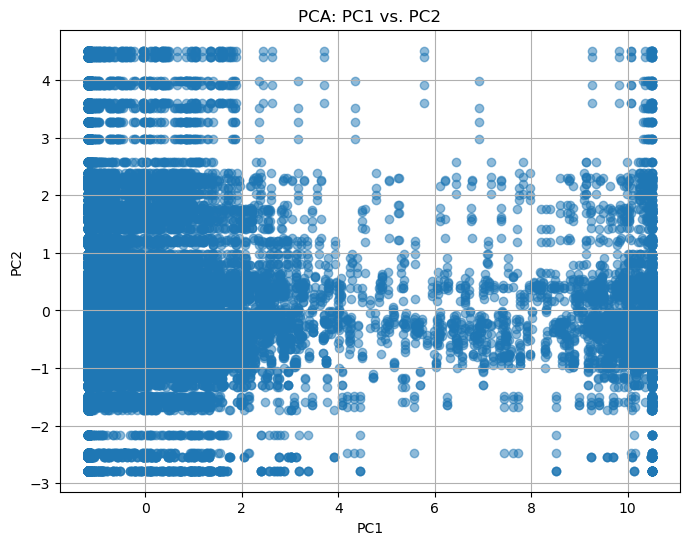

In [39]:
import matplotlib.pyplot as plt

# Crea un gráfico de dispersión para PC1 vs. PC2

plt.figure(figsize=(8, 6))
plt.scatter(pca_df2['PC1'], pca_df2['PC2'], alpha=0.5)
plt.title('PCA: PC1 vs. PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Muestra el gráfico
plt.show()


In [40]:
'''import matplotlib.pyplot as plt

# Crea un gráfico de dispersión para PC1 vs. PC2
plt.figure(figsize=(8, 6))
plt.scatter(pca_df3['PC1'], pca_df3['PC2'],cmap='viridis', alpha=0.5)
plt.title('PCA: PC1 vs. PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar()

# Muestra el gráfico
plt.show()
'''

"import matplotlib.pyplot as plt\n\n# Crea un gráfico de dispersión para PC1 vs. PC2\nplt.figure(figsize=(8, 6))\nplt.scatter(pca_df3['PC1'], pca_df3['PC2'],cmap='viridis', alpha=0.5)\nplt.title('PCA: PC1 vs. PC2')\nplt.xlabel('PC1')\nplt.ylabel('PC2')\nplt.grid(True)\nplt.colorbar()\n\n# Muestra el gráfico\nplt.show()\n"

/var/folders/k7/pj7t376n5fdght7_xd0lf2k00000gp/T/ipykernel_12442/1571113820.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_df3['PC1'], pca_df3['PC3'],cmap='viridis', alpha=0.5)


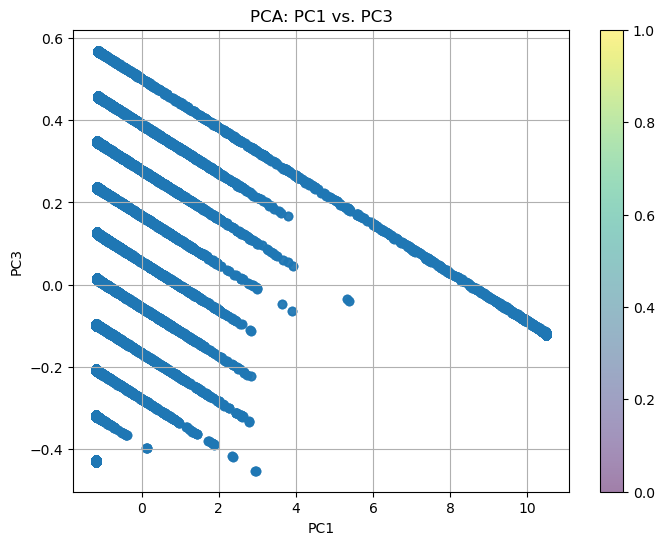

In [41]:
import matplotlib.pyplot as plt

# Crea un gráfico de dispersión para PC1 vs. PC3
plt.figure(figsize=(8, 6))
plt.scatter(pca_df3['PC1'], pca_df3['PC3'],cmap='viridis', alpha=0.5)
plt.title('PCA: PC1 vs. PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.grid(True)
plt.colorbar()

# Muestra el gráfico
plt.show()


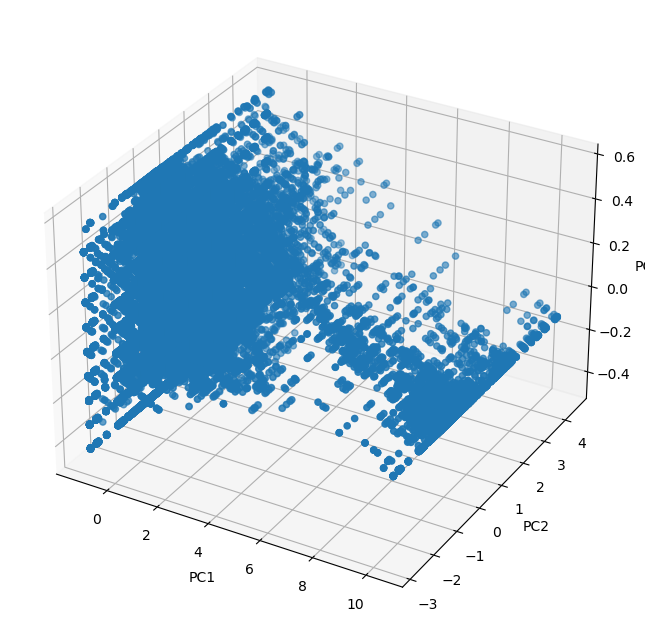

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos de las componentes principales
PC1 = pca_df3['PC1']
PC2 = pca_df3['PC2']
PC3 = pca_df3['PC3']

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico de dispersión 3D
ax.scatter(PC1, PC2, PC3)

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Mostrar el gráfico
plt.show()
